# Analysis of the American Time Use Survey Dataset
## Getting Initialized and Reading in the Data

In [1]:
import datetime as dt
import locale
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
pd.options.display.max_columns = 999

In [3]:
summary = pd.read_csv('data/atussum_2014.dat')
summary = summary.rename(columns={'tucaseid': 'TUCASEID'})
activity = pd.read_csv('data/atusact_2014.dat')
resp = pd.read_csv('data/atusresp_2014.dat', parse_dates=['TUDIARYDATE'])
cps = pd.read_csv('data/atuscps_2014.dat')

# Laundry

### Laundry Activity by Respondents

Number of minutes spent doing laundry (`t020102`) for those who did laundry. Shown as total, then broken out by:
* sex
    * further breakdown by sex of employed only
* children in household status

In [4]:
laundry = summary[summary['t020102'] > 0]
laundry_mean = laundry['t020102'].mean()

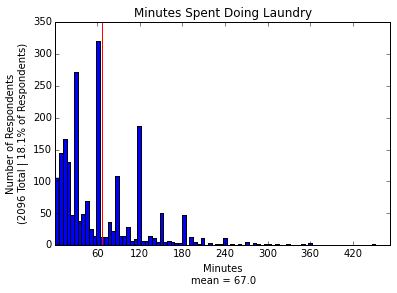

In [5]:
laundry['t020102'].plot(kind='hist', bins=90, 
                        title='Minutes Spent Doing Laundry')
plt.xlabel('Minutes\nmean = {:.1f}'.format(laundry_mean))
plt.ylabel('Number of Respondents\n'
           '({} Total | {:.1f}% of Respondents)'.format(
           len(laundry),(len(laundry)*100/len(summary))))
ymin, ymax = plt.ylim()
plt.xticks(range(0, 480, 60))
plt.vlines(laundry_mean, 0, ymax, color='red')
plt.show()

In [6]:
laundry_dow = pd.merge(resp[['TUCASEID', 'TUDIARYDATE']], laundry)
laundry_dow.index = laundry_dow['TUDIARYDATE']

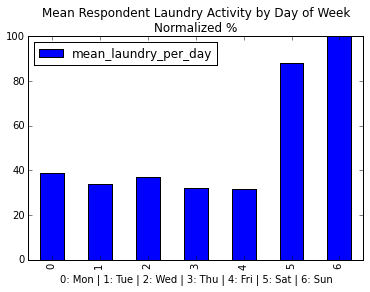

In [7]:
laundry_by_day = laundry_dow['TUDIARYDAY'].resample('d', how=['count'])
laundry_by_day['weekday'] = laundry_by_day.index.weekday
laundry_means_by_day = [laundry_by_day[laundry_by_day['weekday'] == x].mean()[0]
                        for x in range(7)]
laundry_max = max(laundry_means_by_day)
laundry_means_by_day = [laundry_means_by_day[x]*100/laundry_max 
                        for x in range(7)]
pd.DataFrame(laundry_means_by_day) \
    .rename(columns={0: 'mean_laundry_per_day'}) \
    .plot(kind='bar',
          title= 'Mean Respondent Laundry Activity by Day of Week\nNormalized %')
plt.xlabel('0: Mon | 1: Tue | 2: Wed | 3: Thu | 4: Fri | 5: Sat | 6: Sun')
plt.show()

Weekend days are more popular for doing laundry than weekdays.

### Laundry by Sex
(`TESEX`)

In [8]:
laundry_women      = laundry[laundry.TESEX == 2]
laundry_women_mean = laundry_women['t020102'].mean()
laundry_men        = laundry[laundry.TESEX == 1]
laundry_men_mean   = laundry_men['t020102'].mean()

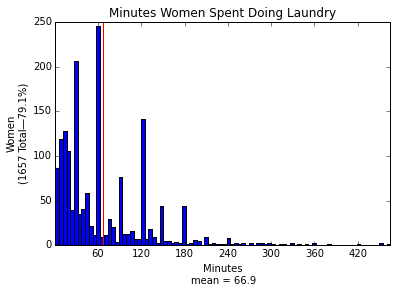

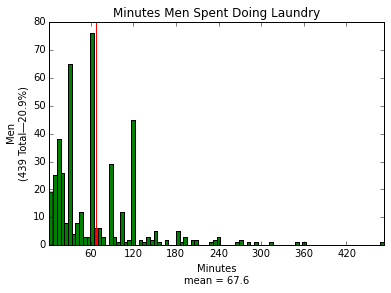

In [9]:
laundry_women['t020102'].plot(kind='hist', bins=90, 
                              title='Minutes Women Spent Doing Laundry')
plt.xlabel('Minutes\nmean = {:.1f}'.format(laundry_women_mean))
plt.ylabel('Women\n({} Total—{:.1f}%)'.format(len(laundry_women), 
                                              (len(laundry_women)*100/len(laundry))))
ymin, ymax = plt.ylim()
plt.xticks(range(0, 480, 60))
plt.vlines(laundry_women_mean, 0, ymax, color='red')
plt.show()

laundry_men['t020102'].plot(kind='hist', bins=90, color='g',
                            title='Minutes Men Spent Doing Laundry')
plt.xlabel('Minutes\nmean = {:.1f}'.format(laundry_men_mean))
plt.ylabel('Men\n({} Total—{:.1f}%)'.format(len(laundry_men), 
                                            (len(laundry_men)*100/len(laundry))))
ymin, ymax = plt.ylim()
plt.xticks(range(0, 480, 60))
plt.vlines(laundry_men_mean, 0, ymax, color='red')
plt.show()

In [10]:
laundry_w_dow = pd.merge(resp[['TUCASEID', 'TUDIARYDATE']], laundry_women)
laundry_w_dow.index = laundry_w_dow['TUDIARYDATE']
laundry_m_dow = pd.merge(resp[['TUCASEID', 'TUDIARYDATE']], laundry_men)
laundry_m_dow.index = laundry_m_dow['TUDIARYDATE']

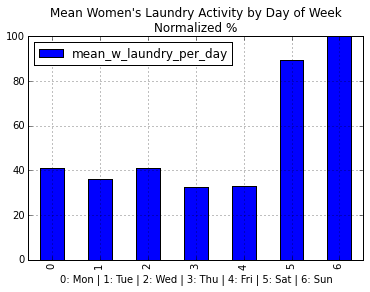

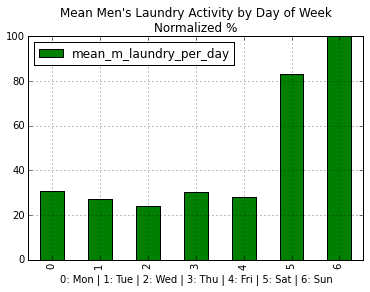

In [11]:
laundry_w_by_day = laundry_w_dow['TUDIARYDAY'].resample('d', how=['count'])
laundry_w_by_day['weekday'] = laundry_w_by_day.index.weekday
laundry_w_means_by_day = [laundry_w_by_day[laundry_w_by_day['weekday'] == x].mean()[0] 
                          for x in range(7)]
laundry_w_max = max(laundry_w_means_by_day)
laundry_w_means_by_day = [laundry_w_means_by_day[x]*100/laundry_w_max 
                          for x in range(7)]
pd.DataFrame(laundry_w_means_by_day) \
    .rename(columns={0: 'mean_w_laundry_per_day'}) \
    .plot(kind='bar', grid=True,
          title= "Mean Women's Laundry Activity by Day of Week\nNormalized %")
plt.xlabel('0: Mon | 1: Tue | 2: Wed | 3: Thu | 4: Fri | 5: Sat | 6: Sun')
plt.show()

laundry_m_by_day = laundry_m_dow['TUDIARYDAY'].resample('d', how=['count'])
laundry_m_by_day['weekday'] = laundry_m_by_day.index.weekday
laundry_m_means_by_day = [laundry_m_by_day[laundry_m_by_day['weekday'] == x].mean()[0] 
                          for x in range(7)]
laundry_m_max = max(laundry_m_means_by_day)
laundry_m_means_by_day = [laundry_m_means_by_day[x]*100/laundry_m_max 
                          for x in range(7)]
pd.DataFrame(laundry_m_means_by_day) \
    .rename(columns={0: 'mean_m_laundry_per_day'}) \
    .plot(kind='bar', color='g', grid=True,
          title= "Mean Men's Laundry Activity by Day of Week\nNormalized %")
plt.xlabel('0: Mon | 1: Tue | 2: Wed | 3: Thu | 4: Fri | 5: Sat | 6: Sun')
plt.show()

A higher proportion of men do laundry on weekends than do women.

### Laundry by Sex, Employed Only
(`TELFS` <= 2)

In [12]:
# Select working men and women
laundry_ww_dow = pd.merge(resp[['TUCASEID', 'TUDIARYDATE']], 
                          laundry_women[laundry_women['TELFS'] <= 2])
laundry_ww_dow.index = laundry_ww_dow['TUDIARYDATE']
laundry_wm_dow = pd.merge(resp[['TUCASEID', 'TUDIARYDATE']], 
                          laundry_men[laundry_men['TELFS'] <= 2])
laundry_wm_dow.index = laundry_wm_dow['TUDIARYDATE']

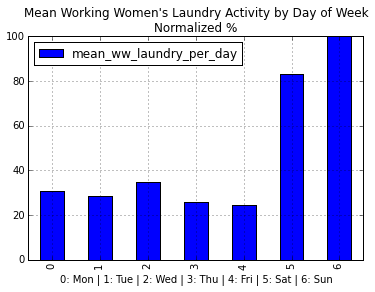

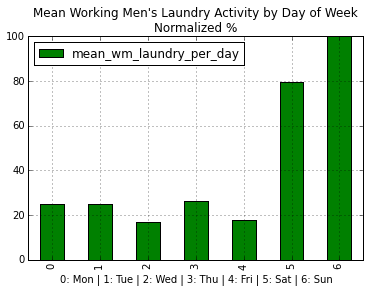

In [13]:
laundry_ww_by_day = laundry_ww_dow['TUDIARYDAY'].resample('d', how=['count'])
laundry_ww_by_day['weekday'] = laundry_ww_by_day.index.weekday
laundry_ww_means_by_day = [laundry_ww_by_day[laundry_ww_by_day['weekday'] == x].mean()[0] 
                           for x in range(7)]
laundry_ww_max = max(laundry_ww_means_by_day)
laundry_ww_means_by_day = [laundry_ww_means_by_day[x]*100/laundry_ww_max 
                           for x in range(7)]
pd.DataFrame(laundry_ww_means_by_day) \
    .rename(columns={0: 'mean_ww_laundry_per_day'}) \
    .plot(kind='bar', grid=True,
          title= "Mean Working Women's Laundry Activity by Day of Week\nNormalized %")
plt.xlabel('0: Mon | 1: Tue | 2: Wed | 3: Thu | 4: Fri | 5: Sat | 6: Sun')
plt.show()

laundry_wm_by_day = laundry_wm_dow['TUDIARYDAY'].resample('d', how=['count'])
laundry_wm_by_day['weekday'] = laundry_wm_by_day.index.weekday
laundry_wm_means_by_day = [laundry_wm_by_day[laundry_wm_by_day['weekday'] == x].mean()[0] 
                           for x in range(7)]
laundry_wm_max = max(laundry_wm_means_by_day)
laundry_wm_means_by_day = [laundry_wm_means_by_day[x]*100/laundry_wm_max 
                           for x in range(7)]
pd.DataFrame(laundry_wm_means_by_day) \
    .rename(columns={0: 'mean_wm_laundry_per_day'}) \
    .plot(kind='bar', color='g', grid=True,
          title= "Mean Working Men's Laundry Activity by Day of Week\nNormalized % ")
plt.xlabel('0: Mon | 1: Tue | 2: Wed | 3: Thu | 4: Fri | 5: Sat | 6: Sun')
plt.show()

When we select just employed people, the relative laundry activity by both sexes during the weekdays decreases significantly.

### Laundry by Children in House Status
(`TRCHILDNUM` > 0)

In [14]:
laundry_parents          = laundry[laundry['TRCHILDNUM'] > 0]
laundry_parents_mean     = laundry_parents['t020102'].mean()
laundry_non_parents      = laundry[laundry['TRCHILDNUM'] == 0]
laundry_non_parents_mean = laundry_non_parents['t020102'].mean()

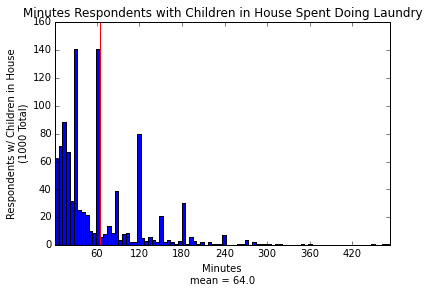

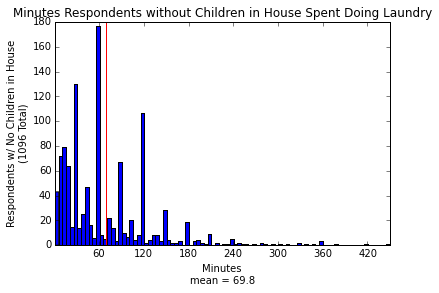

In [15]:
laundry_parents['t020102'] \
    .plot(kind='hist', bins=90, 
          title='Minutes Respondents with Children in House Spent Doing Laundry')
plt.xlabel('Minutes\nmean = {:.1f}'
           .format(laundry_parents_mean))
plt.ylabel('Respondents w/ Children in House\n({} Total)'
           .format(len(laundry_parents)))
ymin, ymax = plt.ylim()
plt.xticks(range(0, 480, 60))
plt.vlines(laundry_parents_mean, 0, ymax, color='red')
plt.show()

laundry_non_parents['t020102'] \
    .plot(kind='hist', bins=90, 
          title='Minutes Respondents without Children in House Spent Doing Laundry')
plt.xlabel('Minutes\nmean = {:.1f}'.format(laundry_non_parents_mean))
plt.ylabel('Respondents w/ No Children in House\n({} Total)'
           .format(len(laundry_non_parents)))
ymin, ymax = plt.ylim()
plt.xticks(range(0, 480, 60))
plt.vlines(laundry_non_parents_mean, 0, ymax, color='red')
plt.show()

## Laundry Summary

**18.1%** of all respondents did laundry on their diary day, spending **~67 minutes** on the task.

### Laundry by Sex

**Women** did the vast majority of the laundry: **79.1%** compared to **20.9%** by **men**. The mean time spent doing laundry was **66.9 minutes for women** and **67.6 minutes for men**; they are spending almost the same amount of time doing the job. **Saturday and Sunday** were by far the most popular days on which to do laundry. For employed men and women, this trend was even stronger.

### Laundry by Children in House Status
People without children in the house spend nearly 6 minutes more on average doing laundry. The mean time spent doing laundry was **64.0 minutes for respondents with children in their house** and **69.8 minutes for households without children**. This is an interesting fact, given that having children in the house increases the amount of clothes that need washing. Perhaps the people in households without children have a more leisurely pace.


# Dishes

Number of minutes spent doing the kitchen and food clean-up (`t020203`). For the purposes of the below, I refer to this as "doing dishes" or "washing dishes."

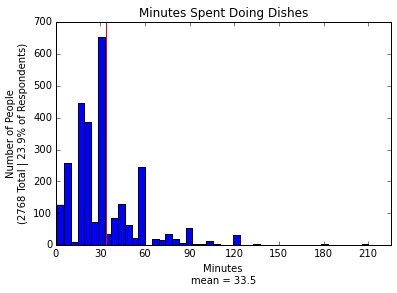

In [16]:
dishes = summary[summary['t020203'] > 0]
dishes_mean = dishes['t020203'].mean()
dishes['t020203'].plot(kind='hist', bins=90, 
                       title='Minutes Spent Doing Dishes')
plt.xlabel('Minutes\nmean = {:.1f}'.format(dishes_mean))
plt.ylabel('Number of People\n({} Total | {:.1f}% of Respondents)'
           .format(len(dishes), (len(dishes)*100/len(summary))))
ymin, ymax = plt.ylim()
plt.xlim(0, 225)
plt.xticks(range(0, 220, 30))
plt.vlines(dishes_mean, 0, ymax, color='red')
plt.show()

I am surprised that only **23.9%** of respondents did dishes on their diary day.

### Dishes by Sex
(`TESEX`)

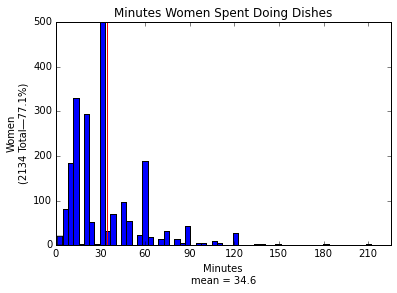

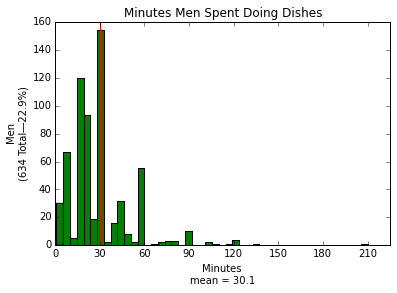

In [17]:
dishes_women      = dishes[dishes.TESEX == 2]
dishes_women_mean = dishes_women['t020203'].mean()
dishes_men        = dishes[dishes.TESEX == 1]
dishes_men_mean   = dishes_men['t020203'].mean()

dishes_women['t020203'].plot(kind='hist', bins=90, 
                              title='Minutes Women Spent Doing Dishes')
plt.xlabel('Minutes\nmean = {:.1f}'.format(dishes_women_mean))
plt.ylabel('Women\n({} Total—{:.1f}%)'
           .format(len(dishes_women), (len(dishes_women)*100/len(dishes))))
ymin, ymax = plt.ylim()
plt.xlim(0, 225)
plt.xticks(range(0, 220, 30))
plt.vlines(dishes_women_mean, 0, ymax, color='red')
plt.show()

dishes_men['t020203'].plot(kind='hist', bins=90, 
                            title='Minutes Men Spent Doing Dishes',
                            color='g')
plt.xlabel('Minutes\nmean = {:.1f}'.format(dishes_men_mean))
plt.ylabel('Men\n({} Total—{:.1f}%)'
           .format(len(dishes_men), (len(dishes_men)*100/len(dishes))))
ymin, ymax = plt.ylim()
plt.xlim(0, 225)
plt.xticks(range(0, 220, 30))
plt.vlines(dishes_men_mean, 0, ymax, color='red')
plt.show()

In [18]:
men_resp = pd.merge(resp, cps[cps.PESEX == 1])
print("Overall percentage of men responding: {:.1f}%"
      .format(len(men_resp)*100/len(resp)))

Overall percentage of men responding: 44.2%


There were 2768 respondents who washed dishes. The overall percentage of male respondents was 44.2%. The below calculates the expected number of men and women doing dishes if they were proportionally equal.

In [19]:
print('Expected women doing dishes if equal: {:.0f}'
      .format(2768 * (1 - .442)))
print('Expected men doing dishes if equal:   {:.0f}'
      .format(2768 * .442))

Expected women doing dishes if equal: 1545
Expected men doing dishes if equal:   1223


I am surprised that more men are not doing dishes. I wonder if married men are doing more dishes than the above.

### Dishes by Married Men
(`PEMARITL`)

In [20]:
dishes_married_men = pd.merge(dishes_men, cps[(cps.PESEX == 1) & 
                                              (cps.PEMARITL == 1)])
print('Number of married men who did dishes: {}'
      .format((len(dishes_married_men['TUCASEID'].unique()))))
print("Percent of those who did dishes that were married men: {:.1f}%"
      .format(len(dishes_married_men['TUCASEID'].unique())*100 \
              /len(dishes_men)))

Number of married men who did dishes: 366
Percent of those who did dishes that were married men: 57.7%


In [21]:
# Number of married men who did dishes divided by
# number of married men expected to be represented if equal to non-married men
418/(634*.484)

1.3622024663034127

## Dishes Summary

### Overall

Only **23.9%** of respondents did dishes on their diary day. The mean time spent doing this activity was **33.5 minutes**.

### Dishes by Sex

**Women did 77.1%** of the dishes in the respondent pool, while **men did 22.9%**. Women took ~4.5 more minutes doing dishes than did men (34.6 minutes vs. 30.1 minutes).

Of the 634 men that did dishes, **418 were married (spouse present)**, or **65.9%**. The overall percentage of men respondents that were married was 48.4%. From the above calculation, we can see that **married men were 36.2% more likely to do dishes** than unmarried men.

# Motorsports

## People Who Watched Motorsports (in Person)
(`t130226`)

In [22]:
print('Number of respondents who watched motorsports (in person): {}'.format(
       len(summary[summary.t130226 > 0])))

Number of respondents who watched motorsports (in person): 2


In [23]:
f1dates = resp[(resp['TUDIARYDATE'] ==  dt.date(2014, 3, 16)) | \
               (resp['TUDIARYDATE'] ==  dt.date(2014, 3, 30)) | \
               (resp['TUDIARYDATE'] ==  dt.date(2014, 4, 6))  | \
               (resp['TUDIARYDATE'] ==  dt.date(2014, 4, 20)) | \
               (resp['TUDIARYDATE'] ==  dt.date(2014, 5, 11)) | \
               (resp['TUDIARYDATE'] ==  dt.date(2014, 5, 25)) | \
               (resp['TUDIARYDATE'] ==  dt.date(2014, 6, 8))  | \
               (resp['TUDIARYDATE'] ==  dt.date(2014, 6, 22)) | \
               (resp['TUDIARYDATE'] ==  dt.date(2014, 7, 6))  | \
               (resp['TUDIARYDATE'] ==  dt.date(2014, 7, 20)) | \
               (resp['TUDIARYDATE'] ==  dt.date(2014, 7, 27)) | \
               (resp['TUDIARYDATE'] ==  dt.date(2014, 8, 24)) | \
               (resp['TUDIARYDATE'] ==  dt.date(2014, 9, 7))  | \
               (resp['TUDIARYDATE'] ==  dt.date(2014, 9, 21)) | \
               (resp['TUDIARYDATE'] ==  dt.date(2014, 10, 5)) | \
               (resp['TUDIARYDATE'] ==  dt.date(2014, 10, 12))| \
               (resp['TUDIARYDATE'] ==  dt.date(2014, 11, 2)) | \
               (resp['TUDIARYDATE'] ==  dt.date(2014, 11, 9)) | \
               (resp['TUDIARYDATE'] ==  dt.date(2014, 11, 23))]

The above narrows down to just dates on which 2014 F1 races took place

In [24]:
f1possible = pd.merge(summary, f1dates)
print('Number of respondents who may have been F1 spectators: {}'.format(
        len(f1possible[f1possible.t130226 > 0])))

Number of respondents who may have been F1 spectators: 0


I am a fan of F1 racing and would love to understand more about other F1 fans, but unfortunately, only two people watched motorsports and neither watched on any of the days that F1 races took place.

## People Who Participated in Motorsports
(`t130129`)

In [25]:
print('Number of respondents who participated in motorsports: {}'.format(
       len(summary[summary.t130129 > 0])))

Number of respondents who participated in motorsports: 11


In [26]:
ms_income = pd.merge(summary[summary.t130129 > 0], cps[['TUCASEID', 'HEFAMINC']])
ms_income_age = ms_income[['TUCASEID', 'HEFAMINC', 'TEAGE', 't130129']]
ms_income_age_state = pd.merge(pd.merge(ms_income_age, cps), resp)
ms_income_age_state = ms_income_age_state[['TUCASEID', 'HEFAMINC', 'TEAGE', 'GESTFIPS', 
                                           'GEDIV', 'TUDIARYDAY', 't130129']] \
                                         .drop_duplicates()
ms_income_age_state.sort(columns=['HEFAMINC'], ascending=True)

,TUCASEID,HEFAMINC,TEAGE,GESTFIPS,GEDIV,TUDIARYDAY,t130129
8,20140303142238,2,64,5,7,7,60
18,20140403142500,3,15,31,4,1,30
0,20140201142033,8,58,25,1,7,160
26,20141010141060,9,30,20,4,1,375
10,20140402141373,11,36,12,5,1,180
27,20141212141683,12,38,42,2,7,20
14,20140403140036,13,17,49,8,1,210
21,20140605141132,13,17,39,3,7,60
4,20140302142432,14,32,28,6,1,30
1,20140302141574,15,37,27,4,7,360


HEFAMINC values (corresponding subset only)
* 2 \$5,000 to \$7,499
* 3 \$7,500 to \$9,999
* 8 \$25,000 to \$29,999
* 9 \$30,000 to \$34,999
* 11 \$40,000 to \$49,999
* 12 \$50,000 to \$59,999
* 13 \$60,000 to \$74,999
* 14 \$75,000 to \$99,999
* 15 \$100,000 to \$149,999

In [27]:
print('Mean age of motorsport participant repondents: {:.1f}'
      .format(ms_income_age_state.TEAGE.mean()))
print('Standard Deviation of age of motorsport participant repondents: {:.1f}'
      .format(ms_income_age_state.TEAGE.std()))

Mean age of motorsport participant repondents: 36.7
Standard Deviation of age of motorsport participant repondents: 17.5


## Motorsports Summary

The sample size of this group is too small to draw any conclusions, but it is interesting to see the range of incomes represented; it is not restricted to just high-income earners.

# Work

### Hours Worked Per Day by Respondents

I am interested in finding out more about amount of time spent working (`t050101`) in regard to age generally, and then specifically for computer programmers.

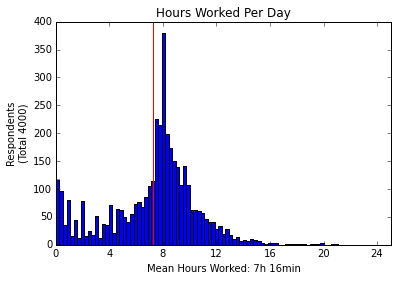

In [28]:
hours_worked = summary[summary['t050101'] > 0][['TUCASEID', 'TEAGE', 'TELFS', 
                                                'TEMJOT', 't050101']].copy()
hours_worked['hours_worked'] = hours_worked['t050101'] / 60
hours_worked['hours_worked'].plot(kind='hist', bins=80, 
                                  title='Hours Worked Per Day')
plt.ylabel('Respondents\n(Total {})'
           .format(len(hours_worked['TUCASEID'].unique())))
ymin, ymax = plt.ylim()
plt.vlines(hours_worked['hours_worked'].mean(), 0, ymax, color='r')
plt.xlabel('Mean Hours Worked: {:.0f}h {:.0f}min' \
           .format(hours_worked.hours_worked.mean(), 
                   (hours_worked.hours_worked.mean() - 
                    int(hours_worked.hours_worked.mean()))*60))
plt.xticks(range(0, 25, 4))
plt.show()

### Hours Worked Per Day, by Full-Time Labor Force
(`TELFS` == 1)

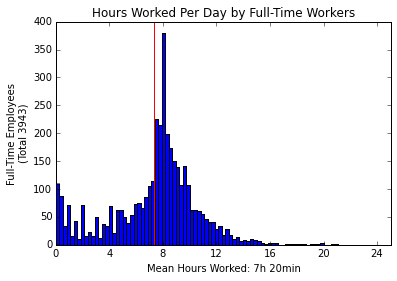

In [29]:
ft_hw = hours_worked[hours_worked.TELFS == 1]
ft_hw['hours_worked'].plot(kind='hist', bins=80, 
                           title='Hours Worked Per Day by Full-Time Workers')
plt.ylabel('Full-Time Employees\n(Total {})'
           .format(len(ft_hw['TUCASEID'].unique())))
ymin, ymax = plt.ylim()
plt.vlines(ft_hw['hours_worked'].mean(), 0, ymax, color='r')
plt.xlabel('Mean Hours Worked: {:.0f}h {:.0f}min' \
           .format(ft_hw.hours_worked.mean(), 
                   (ft_hw.hours_worked.mean() - 
                    int(ft_hw.hours_worked.mean()))*60))
plt.xticks(range(0, 25, 4))
plt.show()

### Hours Worked Per Day, by Full-Time Workers with One Job
(`TEMJOT` == 2)

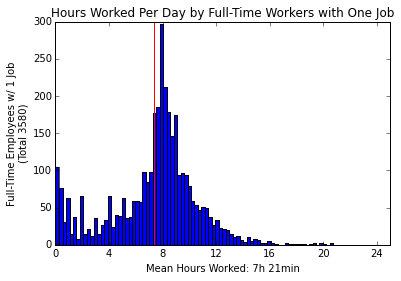

In [30]:
ft_hw_onejob = ft_hw[ft_hw.TEMJOT == 2]
ft_hw_onejob['hours_worked'] \
    .plot(kind='hist', bins=80, 
          title='Hours Worked Per Day by Full-Time Workers with One Job')
plt.ylabel('Full-Time Employees w/ 1 Job\n(Total {})'
           .format(len(ft_hw_onejob['TUCASEID'].unique())))
ymin, ymax = plt.ylim()
plt.vlines(ft_hw_onejob['hours_worked'].mean(), 0, ymax, color='r')
plt.xlabel('Mean Hours Worked: {:.0f}h {:.0f}min' \
           .format(ft_hw_onejob.hours_worked.mean(), 
                   (ft_hw_onejob.hours_worked.mean() - 
                    int(ft_hw_onejob.hours_worked.mean()))*60))
plt.xticks(range(0, 25, 4))
plt.show()

### Correlation of Age with Hours Worked by Full-Time Workers with One Job

In [31]:
print('The Correlation of Age with Hours Worked by Full-Time '
      'Workers with One Job: {:.4f}'
      .format(ft_hw_onejob.hours_worked.corr(ft_hw_onejob.TEAGE)))

The Correlation of Age with Hours Worked by Full-Time Workers with One Job: -0.0243


This correlation is too close to zero to have any meaning; let's look by occupation type.

### Hours Worked Per Day, by Full-Time Workers with One Job by Occupation Type
(`TRDTOCC1`)

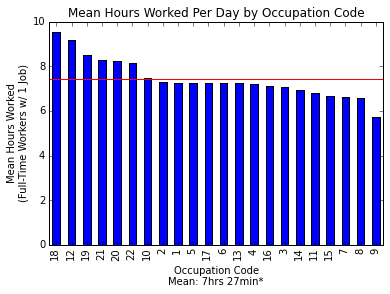

TRDTOCC1
18    9.539080
12    9.174895
19    8.498039
21    8.297143
20    8.240986
22    8.147644
dtype: float64

In [32]:
ft_hw_onejob_indus = pd.merge(ft_hw_onejob, resp[['TUCASEID', 'TRDTOCC1']])

pivot_ft_hw_onejob_indus = ft_hw_onejob_indus \
                               .pivot_table(index='TRDTOCC1', 
                                            columns='TUCASEID', 
                                            values='hours_worked')

mean_ft_hw_indus = pivot_ft_hw_onejob_indus.sum(axis=1) / \
                   pivot_ft_hw_onejob_indus.count(axis=1)

mean_ft_hw_indus.order(ascending=False) \
    .plot(kind='bar',
          title='Mean Hours Worked Per Day by Occupation Code')
plt.xlabel('Occupation Code\nMean: {}hrs {:.0f}min*'
           .format(int(mean_ft_hw_indus.mean()),
                   (mean_ft_hw_indus.mean() - 
                    int(mean_ft_hw_indus.mean()))*60))
plt.ylabel('Mean Hours Worked\n(Full-Time Workers w/ 1 Job)')
xmin, xmax = plt.xlim()
plt.hlines(mean_ft_hw_indus.mean(), xmin, xmax, color='r')
plt.show()
mean_ft_hw_indus.order(ascending=False)[:6]

\*The mean here is different because we have narrowed by respondents who provided an Occupation Code.

Occupation types with a mean average workday over 8 hours:
* 18: Farming, Fishing, and Forestry
* 12: Protective Service
* 19: Construction and Extraction
* 21: Production
* 20: Installation, Maintenance, and Repair
* 22: Transportation and Material Moving

### Hours Worked Per Week, by Full-Time Workers with One Job
(`TEHRUSLT`)

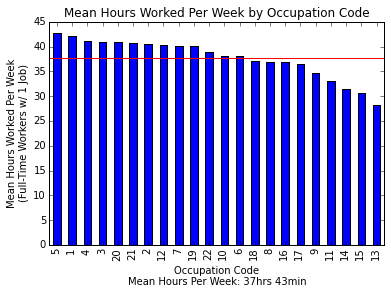

Professions with mean >40 hours per week:


TRDTOCC1
5     42.717949
1     42.103406
4     41.214286
3     40.831858
20    40.820388
21    40.752941
2     40.524675
12    40.347826
7     40.102041
19    40.017483
dtype: float64

In [33]:
ft_hwk_onejob_indus = summary[summary.TELFS == 1] \
                             [['TUCASEID', 'TEHRUSLT', 'TEAGE', 'TELFS', 
                               'TEMJOT', 'TUDIARYDAY', 't050101']].copy()

ft_hwk_onejob_indus = pd.merge(ft_hwk_onejob_indus, resp[['TUCASEID', 'TRDTOCC1']])

pivot_ft_hwk_onejob_indus = ft_hwk_onejob_indus \
                                .pivot_table(index='TRDTOCC1',
                                             columns='TUCASEID',
                                             values='TEHRUSLT')

mean_ft_hwk_onejob_indus = pivot_ft_hwk_onejob_indus.sum(axis=1) / \
                           pivot_ft_hwk_onejob_indus.count(axis=1)
    
mean_ft_hwk_onejob_indus.order(ascending=False) \
    .plot(kind='bar',
          title='Mean Hours Worked Per Week by Occupation Code')
plt.xlabel('Occupation Code\nMean Hours Per Week: {}hrs {:.0f}min'
           .format(int(mean_ft_hwk_onejob_indus.mean()),
                   (mean_ft_hwk_onejob_indus.mean() - 
                   int(mean_ft_hwk_onejob_indus.mean()))*60))
plt.ylabel('Mean Hours Worked Per Week\n(Full-Time Workers w/ 1 Job)')
xmin, xmax = plt.xlim()
plt.hlines(mean_ft_hwk_onejob_indus.mean(), xmin, xmax, color='r')
plt.show()
mean_ft_hwk_onejob_indus = mean_ft_hwk_onejob_indus.order(ascending=False)
print('Professions with mean >40 hours per week:')
mean_ft_hwk_onejob_indus[:10]

Occupation types with a mean average work week over 40 hours:

* 5: Life, Physical, and Social Science
* 1: Management
* 4: Architecture and Engineering
* 3: Computer and Mathematical
* 20: Installation, Maintenance, and Repair
* 21: Production
* 2: Business and Financial Operations
* 12: Protective Service
* 7: Legal
* 19: Construction and Extraction

### Hours of Work Per Day, by Full-Time Computer and Mathematical Workers with One Job by Day of Week
(`TRDTOCC1` == 3)

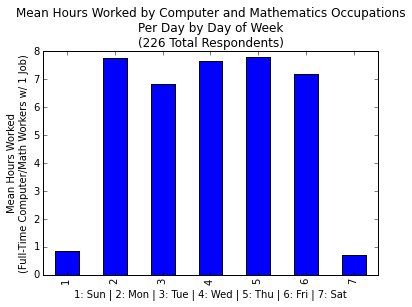

In [34]:
ft_hw_dow_onejob_compmath = ft_hwk_onejob_indus[
                                ft_hwk_onejob_indus['TRDTOCC1'] == 3]

pivot_ft_hw_dow_onejob_compmath = ft_hw_dow_onejob_compmath \
                                      .pivot_table(index='TUDIARYDAY',
                                                   columns='TUCASEID',
                                                   values='t050101')

mean_ft_hw_dow_onejob_compmath = pivot_ft_hw_dow_onejob_compmath.sum(axis=1) / \
                                 pivot_ft_hw_dow_onejob_compmath.count(axis=1) / 60

mean_ft_hw_dow_onejob_compmath \
    .plot(kind='bar',
          title='Mean Hours Worked by Computer and Mathematics Occupations\n'
          'Per Day by Day of Week\n({} Total Respondents)'
          .format(len(ft_hw_dow_onejob_compmath)))
plt.xlabel('1: Sun | 2: Mon | 3: Tue | 4: Wed | 5: Thu | 6: Fri | 7: Sat')
plt.ylabel('Mean Hours Worked\n(Full-Time Computer/Math Workers w/ 1 Job)')
plt.show()

### Mean Hours Worked Per Week by Computer and Mathematics Occupations by Age

The overall mean of hours worked per week by computer and mathematics occupations was **40.83 hours**. How does this vary by age?

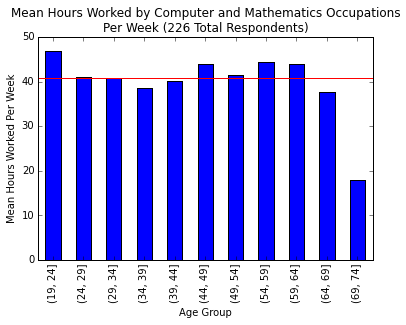

In [35]:
pivot_ft_hw_age_onejob_compmath = ft_hw_dow_onejob_compmath.pivot_table(index='TEAGE',
                                                                        columns='TUCASEID',
                                                                        values='TEHRUSLT')

mean_ft_hw_age_onejob_compmath = pd.DataFrame(pivot_ft_hw_age_onejob_compmath.sum(axis=1) / \
                                              pivot_ft_hw_age_onejob_compmath.count(axis=1))

mean_ft_hw_age_onejob_compmath['age_group'] = pd.cut(mean_ft_hw_age_onejob_compmath.index,
                                                     np.arange(19,75,5))

mean_ft_hw_age_onejob_compmath.index = range(len(mean_ft_hw_age_onejob_compmath))

pivot_mean_ft_hw_age_onejob_compmath = mean_ft_hw_age_onejob_compmath.pivot_table(
                                          index='age_group',
                                          columns=mean_ft_hw_age_onejob_compmath.index,
                                          values=0)
group_mean_ft_hw_age_onejob_compmath = pivot_mean_ft_hw_age_onejob_compmath.sum(axis=1) / \
                                       pivot_mean_ft_hw_age_onejob_compmath.count(axis=1)

group_mean_ft_hw_age_onejob_compmath.plot(
    kind='bar',
    title='Mean Hours Worked by Computer and Mathematics Occupations\n'
    'Per Week ({} Total Respondents)'.format(
    len(ft_hw_dow_onejob_compmath)))
xmin, xmax = plt.xlim()
plt.hlines(mean_ft_hwk_onejob_indus.iloc[3], xmin, xmax, color='r')
plt.xlabel('Age Group')
plt.ylabel('Mean Hours Worked Per Week')
plt.show()

## Summary of Hours Worked

### Hours Worked Per Day
#### Overall
Of the 4000 respondents who worked on their diary day, the mean hours worked was **7 hours, 16 minutes**.

#### Respondents with Full-Time Employment
Of the 3943 respondents with full-time employment, the mean hours worked was **7 hours, 20 minutes**.

#### Respondents with One Full-Time Job
Of the 3580 respondents with one full-time job, the mean hours worked was **7 hours, 21 minutes**.

#### By Occupation
There were 6 occupation types with a **mean average workday over 8 hours**:
* 9.54 h/d | Farming, Fishing, and Forestry
* 9.17 h/d | Protective Service
* 8.50 h/d | Construction and Extraction
* 8.30 h/d | Production
* 8.24 h/d | Installation, Maintenance, and Repair
* 8.15 h/d | Transportation and Material Moving

**Farming, Fishing, and Forestry** occupations, with **9.54 hours/day**, are head and shoulders above the rest in terms of single-day workload.

### Hours Worked Per Week

#### Overall
Of the 3580 respondents with one full-time job, the mean weekly hours worked was **37 hours, 43 minutes**.

#### By Occupation
There were 10 occupation types with a **mean average workweek over 40 hours**:
* 42.72 h/wk | Life, Physical, and Social Science
* 42.10 h/wk | Management
* 41.21 h/wk | Architecture and Engineering
* 40.83 h/wk | Computer and Mathematical
* 40.82 h/wk | Installation, Maintenance, and Repair
* 40.75 h/wk | Production
* 40.52 h/wk | Business and Financial Operations
* 40.35 h/wk | Protective Service
* 50.10 h/wk | Legal
* 40.02 h/wk | Construction and Extraction

#### Computer and Mathematical Occupations by Age
The 226 respondents in this occupational category worked an average of **40.83 hours/week**, with **~1.5 hours** of the work done on the weekend. When looking across the age spectrum, there were some interesting trends: respondents **aged 20–24 worked 46.88 hours/week**, the most number of any 5-year grouping. From there, the trend is downward, bottoming out with respondents **aged 35–39 working 38.52 hours/week**. From there, the trend is mostly back up to **~44&nbsp;hours/week** (with a slight dip back down to 41.42 hours/week for 50–54 year-olds) until 65+ years old.